In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("/Users/johnmadrid/GitHub/MLinPractice/data/preprocessing/labeled.csv")

# df.head()
# df.columns
df.describe()

In [ ]:
# Variance can help us identify which features values change the most. Those that have
# a low variance means numbers stay pretty much same and will probably not tell us much.
# On the contrary, those with high variance can tell us what us going on with the data.
df.var()

In [ ]:
scatter = df[["likes_count", "replies_count", "retweets_count", "language", "video", "label", "time"]]
scatter["photos"] = df["photos"].map(lambda x: len(x[1:-1].split(', ')))
scatter["urls"] = df["urls"].map(lambda x: len(x[1:-1].split(', ')))
scatter["hashtags"] = df["hashtags"].map(lambda x: len(x[1:-1].split(', ')))

In [ ]:
# groups means by language
grouped_mean_lang = scatter.groupby('language').mean()

np.log10(grouped_mean_lang).plot(kind='bar')
plt.show()

In [ ]:
# group mean and variance by label which show interesting features to be those to the left
group_means_label = scatter.groupby('label').mean()
group_var_label = scatter.groupby('label').var()

np.log10(group_means_label).plot(kind='box')
np.log10(group_var_label).plot(kind='box')



In [ ]:
groups = scatter.groupby('label')

print(groups)

In [ ]:
# Heatmap help us find the correlation between the different data features (fig. top)
# Heat map correlation of features after selection (fig. bottom)
import seaborn as sn
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8))

sn.heatmap(df.corr(), ax=ax1)
ax1.set_title("Feature correlation initial tweets data")
sn.heatmap(scatter.corr(), ax=ax2)
ax2.set_title("Feature correlation after selection")
fig.tight_layout()
plt.show()

In [ ]:
# sn.pairplot(df[["likes_count", "replies_count", "retweets_count", "language", "video", "label", "time"]])

Error in callback <function flush_figures at 0x7fbb310e2e18> (for post_execute):


KeyboardInterrupt: 

In [ ]:
(def scatterviral(groups, x, y, xlog = False, ylog = False, plot_title = ""):
    fig, ax = plt.subplots(figsize=(7,5))
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
    if xlog:
        ax.set_xscale('log')
    if ylog:
        ax.set_yscale('log')

    for name, group in groups:
        ax.plot(group[x], group[y], marker='o', linestyle='', ms=1, label=name, alpha = 0.3)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.title.set_text(plot_title)
    L = ax.legend()
    L.get_texts()[0].set_text("Not-viral")
    L.get_texts()[1].set_text("Viral")


    # plt.savefig("retweets_count_as_function_of_likes_count.png")
    plt.show()

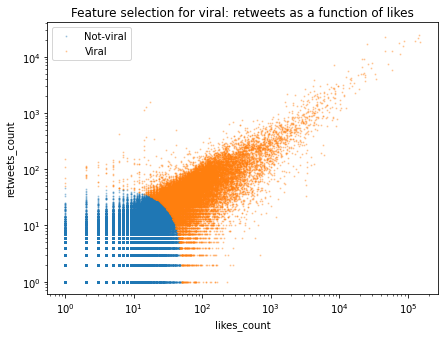

In [325]:
scatterviral(groups, 'likes_count', 'retweets_count', True, True, plot_title = "Feature selection for viral: retweets as a function of likes")


In [326]:
# scatterviral(groups, 'time', 'likes_count', False, True)

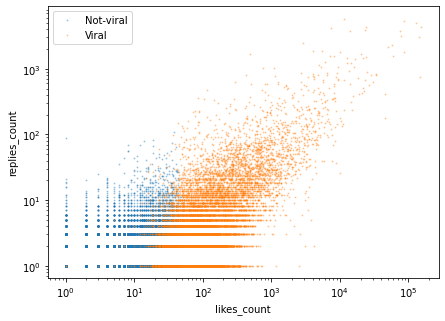

In [327]:
scatterviral(groups, 'likes_count', 'replies_count', True, True)

In [328]:
likes_to_viral = df[["likes_count", "label"]]
retweets_to_viral = df[["retweets_count", "label"]]
replies_to_viral = df[["replies_count", "label"]]

likes_groups = likes_to_viral.groupby('label')
retweets_groups = retweets_to_viral.groupby('label')
replies_groups = replies_to_viral.groupby('label')




In [329]:
likes_groups.describe()
# Learning: Likely not viral if likes < 50

likes_count                                                           
            count        mean          std  min   25%   50%    75%       max
label                                                                       
False    268651.0    5.419749     6.847849  0.0   1.0   3.0    8.0      49.0
True      27160.0  220.584352  2274.185469  0.0  38.0  56.0  107.0  151373.0

In [330]:
retweets_groups.describe()
# Learning: Likely not viral if retweets < 47

retweets_count                                                       
               count       mean         std  min   25%   50%   75%      max
label                                                                      
False       268651.0   3.977279    5.309888  0.0   0.0   2.0   6.0     46.0
True         27160.0  77.160825  439.857604  0.0  25.0  36.0  59.0  24699.0

In [331]:
replies_groups.describe()
# Learning: Does not explain virality as well, given percentile distributions are flat between true and false labelled tweets

replies_count                                                   
              count       mean         std  min  25%  50%  75%     max
label                                                                 
False      268651.0   0.291467    1.125718  0.0  0.0  0.0  0.0   110.0
True        27160.0  10.763697  106.084441  0.0  0.0  1.0  3.0  5811.0

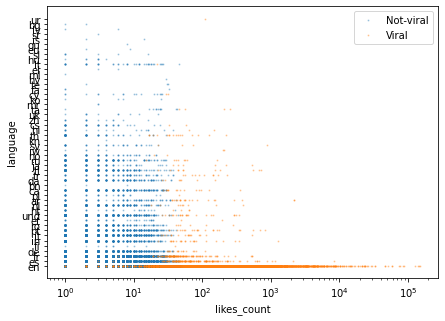

In [332]:
scatterviral(groups, 'likes_count', 'language', True, False)
# Learning: much more likely to be viral with < 50 likes if language is 'en'

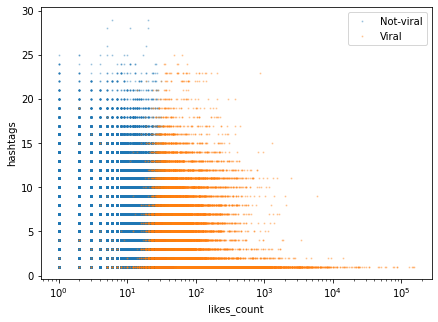

In [333]:
scatterviral(groups, 'likes_count', 'hashtags', True, False)


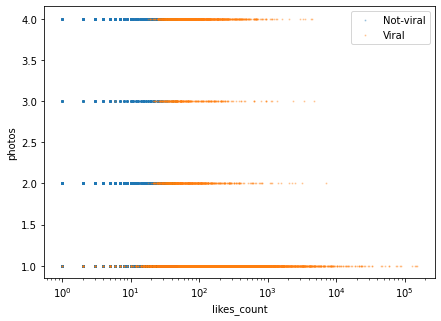

In [334]:
scatterviral(groups, 'likes_count', 'photos', True, False)

In [335]:
# filter by viral tweets
viral = likes_to_viral[likes_to_viral["label"] == 1]

viral["likes_count"].mean()

220.58435198821797

In [301]:
count = viral["likes_count"].value_counts()


count

33.0      509
35.0      506
38.0      501
36.0      495
32.0      475
         ... 
660.0       1
726.0       1
1452.0      1
1175.0      1
2090.0      1
Name: likes_count, Length: 1443, dtype: int64

<AxesSubplot:xlabel='[0]', ylabel='[0]'>

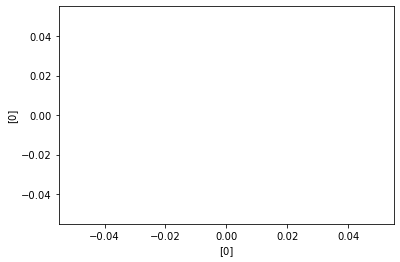

In [96]:
viral.plot.scatter(pd.DataFrame(['likes_count']), pd.DataFrame(['retweets_count']))

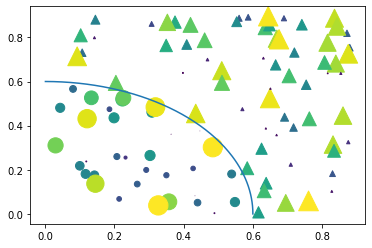